# **HR Turnover Reason and Solution Analysis**



In [235]:
import numpy as np
import pandas as pd 
from pathlib import Path

In [236]:
BASE_DIR = Path().resolve()
file_name = "HR_comma_sep.csv"
data_path = BASE_DIR / file_name

In [237]:
df = pd.read_csv(data_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# **Preprocessing**

Missing Values, Data Types, and Data size

In [238]:
#checking missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [173]:
df.shape

(14999, 10)

In [174]:
df[['Department', 'salary']].nunique()

Department    10
salary         3
dtype: int64

In [175]:
pd.unique(df['Department'])

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [176]:
pd.unique(df['salary'])

array(['low', 'medium', 'high'], dtype=object)

Duplication Handling

In [177]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [239]:
df_ = df.copy().drop_duplicates()

In [179]:
df_.shape

(11991, 10)

In [180]:
df_.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [273]:
df_ = df_.rename(columns={'Work_accident':'work_accident', 'time_spend_company':'tenure', 'Department':'department', 'average_montly_hours':'avg_monthly_hours'})

In [182]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   avg_monthly_hours      11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


# **Exploratory Data Analysis**

In [295]:
import matplotlib.pyplot as plt
import seaborn as sns

In [296]:
mapping = {'low':0, 'medium':1, 'high':2}
df_['salary_cat_num'] = df_['salary'].map(mapping)

In [297]:
# portion of the outcome varialbe
left_portion = {'left':round(df_['left'].mean(),6), 'stay':round(1-df_['left'].mean(),6)}
print(left_portion)

{'left': 0.166041, 'stay': 0.833959}


In [298]:
df_.describe()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary_cat_num
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,0.60387
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,0.63590
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.00000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,0.00000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.00000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,1.00000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.00000


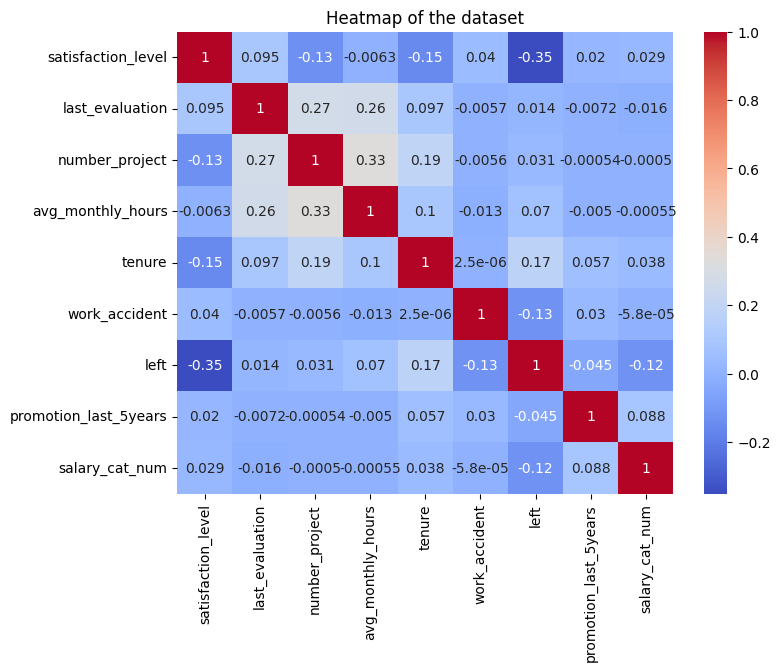

In [299]:
# heatmap of correlation between all numeric variables
plt.figure(figsize=(8, 6))
sns.heatmap(df_[['satisfaction_level', 'last_evaluation', 'number_project',\
       'avg_monthly_hours', 'tenure', 'work_accident', 'left',\
       'promotion_last_5years','salary_cat_num']].corr(), annot=True, cmap="coolwarm")
plt.title('Heatmap of the dataset')
plt.show()

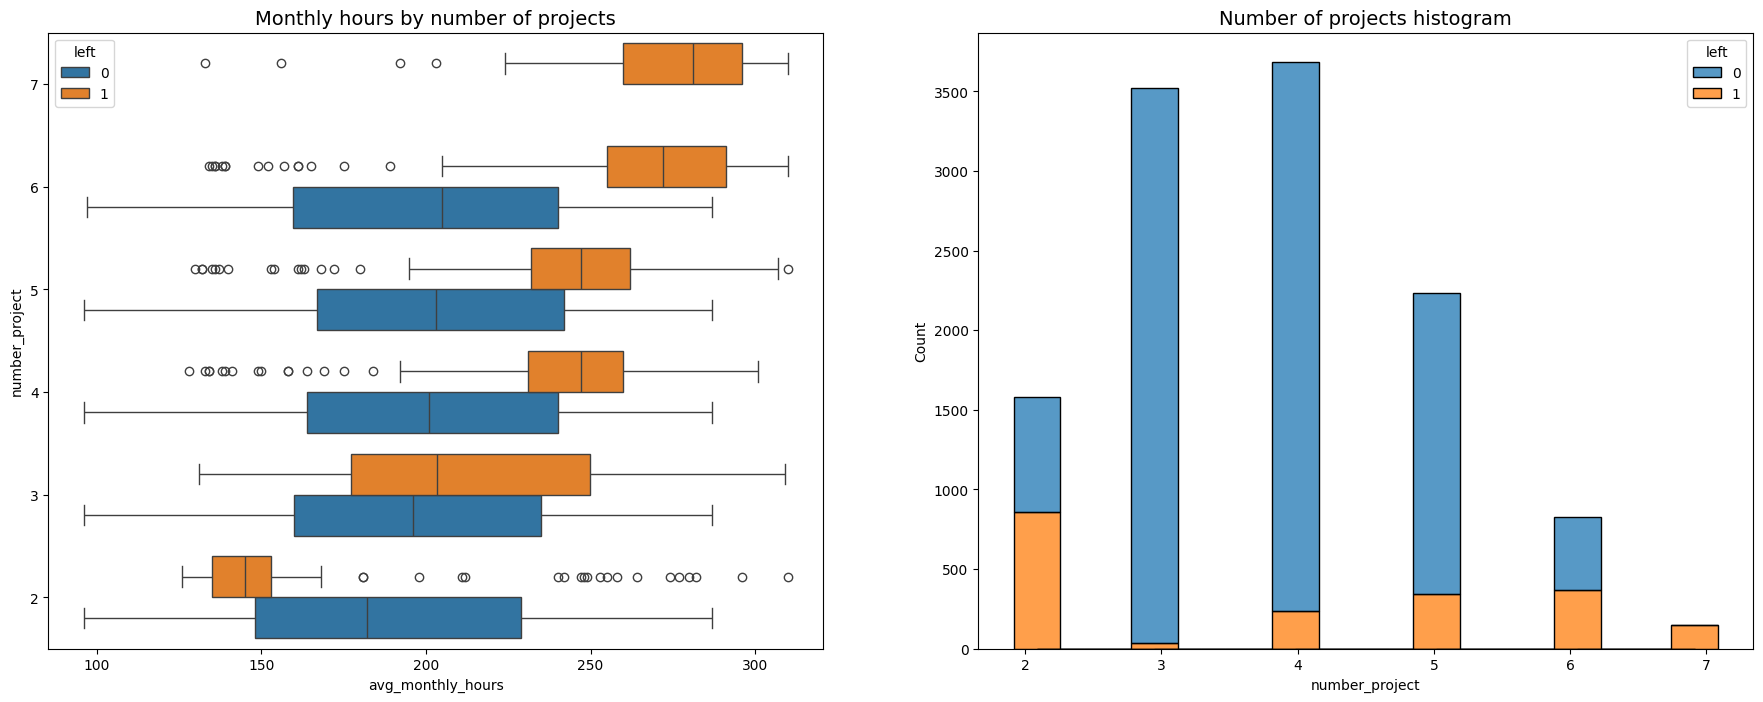

In [188]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df_, x='avg_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
# tenure_stay = df_[df_['left']==0]['number_project']
# tenure_left = df_[df_['left']==1]['number_project']
sns.histplot(data=df_, x='number_project', hue='left', multiple='stack', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

Explanation of Satisfaction by Working Hours
From the graph, we can observe one trend and two differences:

Firstly, the trend: From the box plot on the left, we can see that both left and staying employees exhibit an increase in average monthly working hours as the number of projects they are responsible for increases, indicating a positive correlation between the two.

Secondly, the first difference: The difference in average working hours between left and staying employees. For most groups, the average monthly working hours of all left employees exceed those of staying employees handling the same number of projects, except for the group with 2 projects, where the average monthly working hours are significantly lower than any other group. As for the group with 7 projects, there are no staying employees, employees with 7 project all left.

This leads to the second difference, which is that the working patterns of left employees differ significantly from those of staying employees. The variability in average monthly working hours for left employees is very high, whereas staying employees exhibit more uniform working patterns in comparison. The average monthly working hours of left employees fluctuate drastically depending on the number of projects they are responsible for, ranging from below 150 to over 275 hours. In contrast, the average monthly working hours of staying employees remain relatively stable, ranging from just over 175 to a little over 200 hours. Another piece of evidence for the high variability in working hours among left employees can be seen from the outliers in the box plot. Left employees, regardless of the number of projects they handle, almost always have outliers (except for the group with 3 projects), which is very different from staying employees: staying employees have no outliers in their box plots regardless of the number of projects they are responsible for. Outliers indicate that some observations are below the first quartile or above the third quartile, suggesting that there is significant variability in the working hours of left employees, making it difficult to describe them with a single clear value.
從圖上我們可以看出一個趨勢和兩個分別：
首先是趨勢，從左邊的那張盒鬚圖我們可以發現，無論是離職員工或留任員工，隨著負責的project數目增加，平均的月工作時數也會增加，兩者間有正向的關聯性。
其次是第一個分別，離職員工與留任員工的平均工時的差別：對大多數組別而言，所有的離職員工的平均月工時都超過負責相同數量的留任員工，除了project=2的組別之外，該組別的平均月工時顯著的低於任何一組。至於project=7的組別，並沒有任何留任員工
這也呼應了第二個區別，也就是離職員工的表現形態與留任員工很不一樣，離職員工的平均月工時變異性很高，而留任的員工相比之下有比較統一的表現形態。離職員工的平均月工時會因為負責的project數量而有劇烈的變化，從低於150到超過275都有可能，相比之下，留任員工的平均月工時變化不大，只在175-200出頭間遊走。另外一個可以看出離職員工的工時有很大的變化性的證據可以透過盒鬚圖上的outliner判斷，離職員工的無論負責多少個專案，幾乎都有outliner(除了project=3），而這點正好與留任員工非常不同：留任員工不論同時負責幾個project，盒鬚圖都沒有outliner。outliner表示一些觀察值低於第一四分位數或高於第三四分位數，表示離職員工在工時上的變異性很大，每個離職員工之間較難用單一一個明確的數值來描述。

In [189]:
df_[df_['number_project']>6]['left'].value_counts()

left
1    145
Name: count, dtype: int64

**Scatter Plot of Average Working Hours by Satisfaction Score**
If employee working 8 hrs/day, and 5 days a week, and there are 52 weeks a year, then 8*5*52/12 ~= 173 hr/ month for a regular monthly working hour
that is, if one worked more than 173 hours a month, it's consider over-worked  

/var/folders/6m/x2hsmxhs6gsb8wn8q4dw3mkm0000gn/T/ipykernel_17555/4016152980.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.axvline(x=df_[df['left']== 0]['avg_monthly_hours'].max(), color='red', linestyle='-')


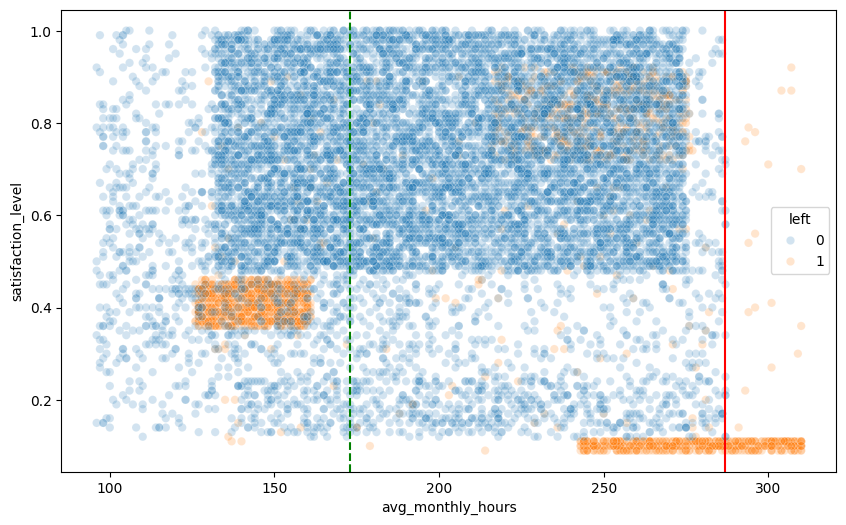

In [190]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_, x='avg_monthly_hours', y='satisfaction_level', hue='left',alpha=0.2)
plt.axvline(x=173, color='green', linestyle='--') # standard average monthly hour 
# plt.axvline(x=244, color= 'red', linestyle='-') # average satisfaction for group 1 
# plt.axvline(x=275, color='red', linestyle='-') # average satisfaction for group 2
plt.axvline(x=df_[df['left']== 0]['avg_monthly_hours'].max(), color='red', linestyle='-') # the max working hour of who stays
plt.show()

In [191]:
a=df_[df['left']== 0]['avg_monthly_hours'].max()
print(a)

287


/var/folders/6m/x2hsmxhs6gsb8wn8q4dw3mkm0000gn/T/ipykernel_17555/686945675.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a=df_[df['left']== 0]['avg_monthly_hours'].max()


Summary of the scatter plot of average working hours by satisfaction score
從圖上來看可以發現，離開的人有較明顯的三個種類
第一類是低滿意度高工時：這些人的平均月工時大概落在275小時，也就是比正常工時多出了60%, 平均一天12.69小時在工作，這群人的滿意度非常低，不超過0.1
第二類離職員工是高滿意度高工時：這些人的平均月工時大致在落在250小時，比正常工時多出了45%,平均一天有11.53小時在工作，這群人的工作滿意度大概平均落在0.8左右
第三類離職員工是低工時中低滿意度：這些人的平均月工時少於150小時，平均起來，一天工作不到7小時，工作滿意度平均落在0.4
還有一項現象是，沒有留下來的員工平均月工時超過287小時，（每日平均工時13.24），無論他們的滿意度為何，都會離職

**Histogram of Tenures**

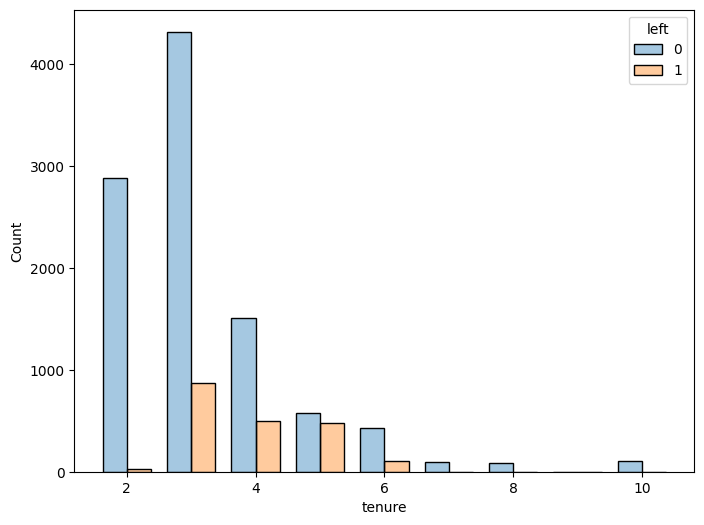

In [192]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_, x='tenure', hue='left',stat='count',multiple='dodge',discrete=True, shrink=0.75, alpha=0.4)
plt.show()

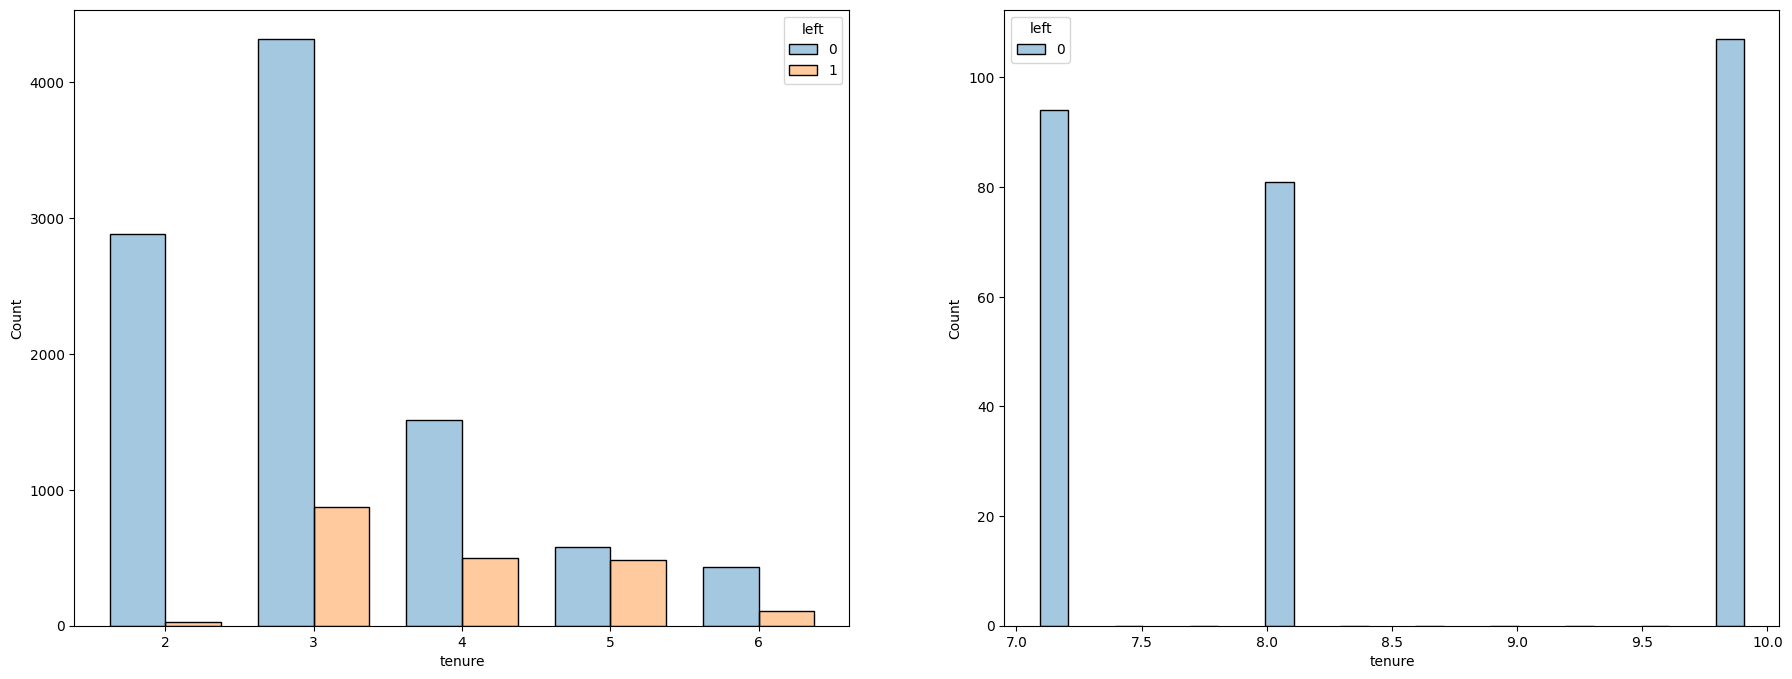

In [193]:
tenure_short = df_[df_['tenure'] < 7]
tenure_long = df_[df_['tenure'] >= 7]
fig,ax = plt.subplots(1,2,figsize=(22,8))
sns.histplot(data=tenure_short, x='tenure',hue='left', multiple='dodge', \
             stat='count', bins=5, discrete=True, shrink= 0.75, alpha=0.4, ax=ax[0])
sns.histplot(data=tenure_long, x='tenure',hue='left', multiple='dodge', \
             stat='count', shrink=0.38, alpha=0.4, ax=ax[1])

plt.show()

Summary of Tenure
The majority employee's tenure is under 7 year
no one left with tenure over 7 years
有五年年資的離職者與在職者差別數量最少
離職者最多為三年年資者，此後依年資升高而離職人數降低
so what?
年資與離職其實沒有線性關係，反而應該說離職者與在職者是兩群人。


<Axes: xlabel='tenure', ylabel='Count'>

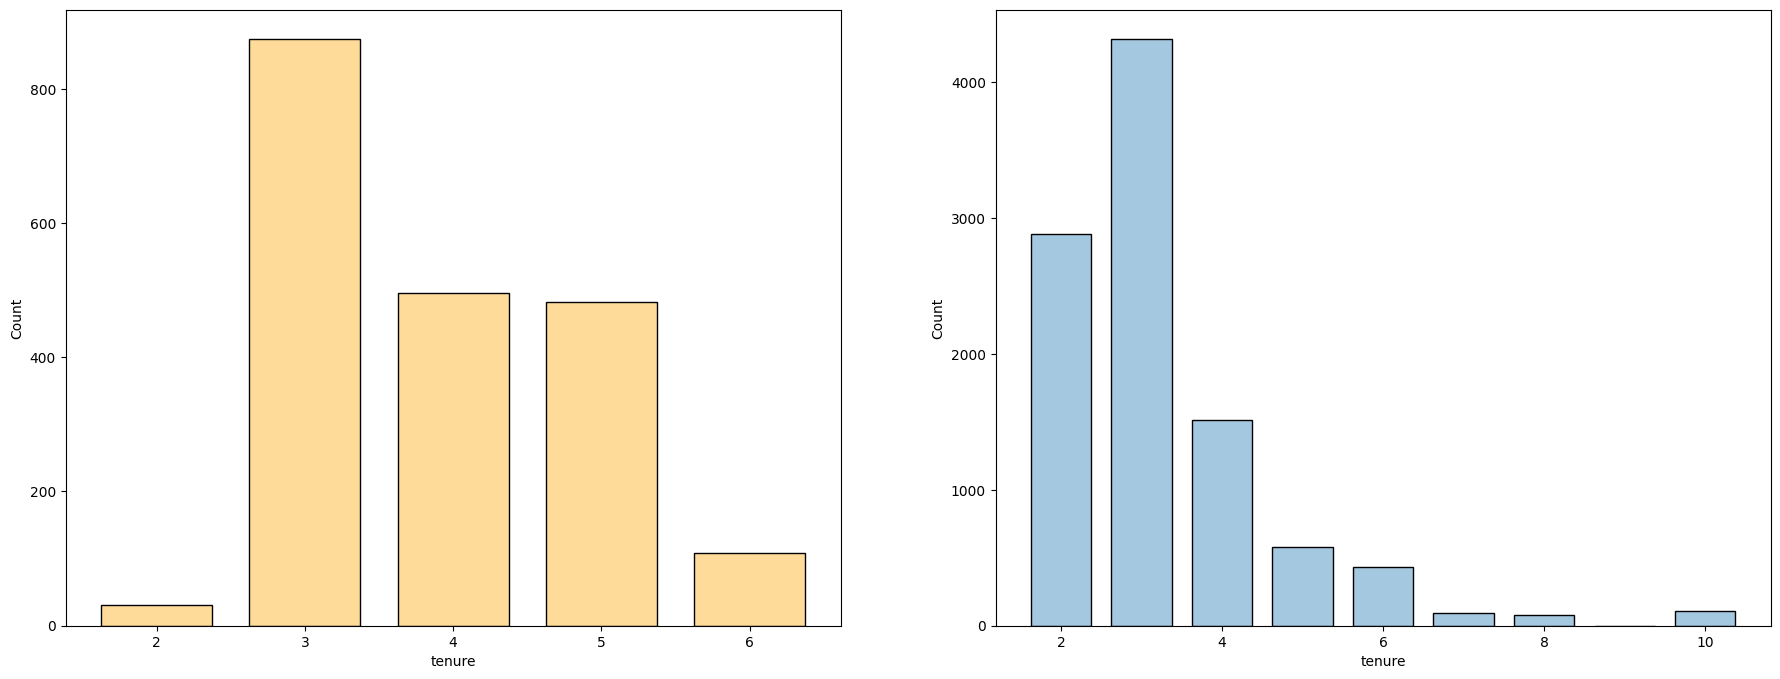

In [194]:
fig,ax = plt.subplots(1,2,figsize=(22,8))
sns.histplot(data=df_[df_['left']==1], x='tenure', \
             stat='count', discrete=True, shrink= 0.75, alpha=0.4, color='orange', ax=ax[0])
sns.histplot(data=df_[df_['left']==0], x='tenure', \
             stat='count', discrete=True, shrink= 0.75, alpha=0.4, ax=ax[1])

**Promotion X Leaving Status**

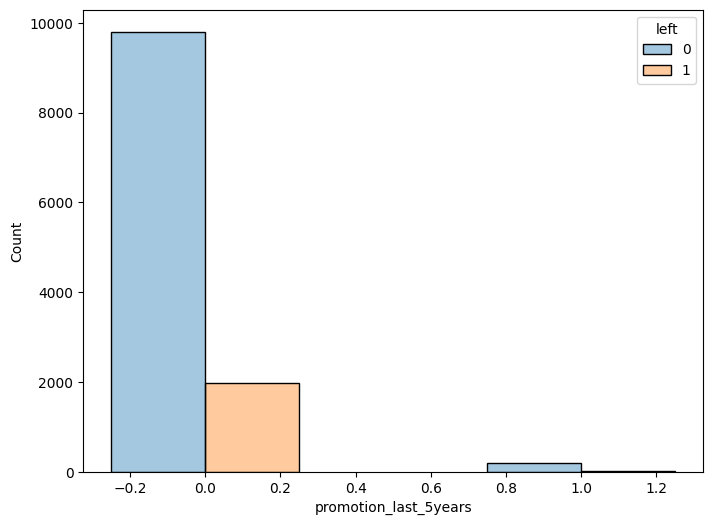

In [196]:
plt.figure(figsize=(8,6))
sns.histplot(data=df_, x='promotion_last_5years', hue='left', stat='count', \
             multiple='dodge',discrete=True, shrink= 0.5, alpha=0.4)
plt.show()

In [197]:
promo_left_table=pd.crosstab(df_['promotion_last_5years'],df_['left'])

In [289]:
promo_left_table

left,0,1
promotion_last_5years,,
0,9805,1983
1,195,8


In [198]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(promo_left_table)
print('Chi-square = ',stat)
print('p-value = ', round(p, 6))

Chi-square =  22.992127549276592
p-value =  2e-06


Interpretation of the Chi-Square result
left and promotion is not independent, their might be some covariance exist
however, based on the correlation heatmap, the correlation is very weak.

In [200]:
# last evaluation x left

<Figure size 800x600 with 0 Axes>

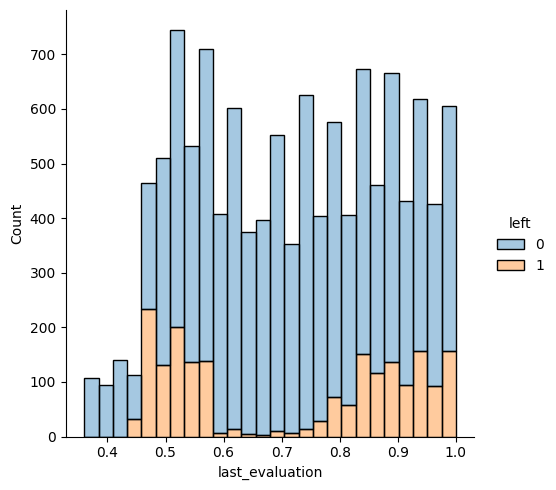

In [201]:
plt.figure(figsize=(8, 6))
sns.displot(data=df_, x='last_evaluation', hue='left', multiple='stack', alpha=0.4)
plt.show()

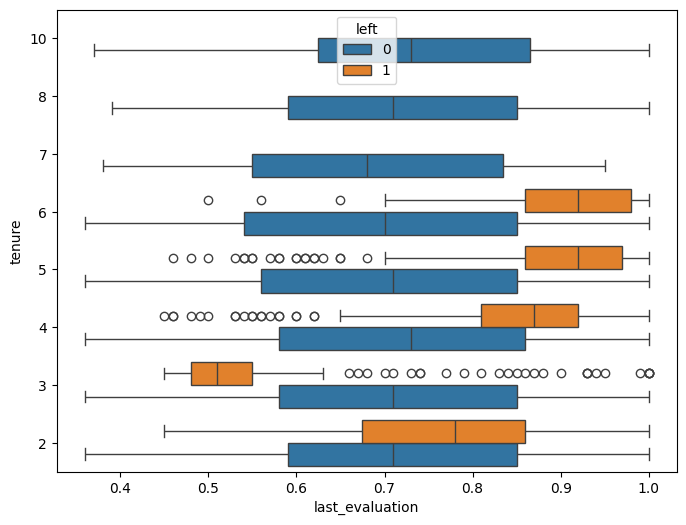

In [202]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_, x='last_evaluation', y='tenure', hue='left', orient="h").invert_yaxis()
plt.show()

Summary of Evaluation
從考核評鑑的狀況來看，相較於離職員工，在職員工的分布較為分散

**Left Employee by Department**

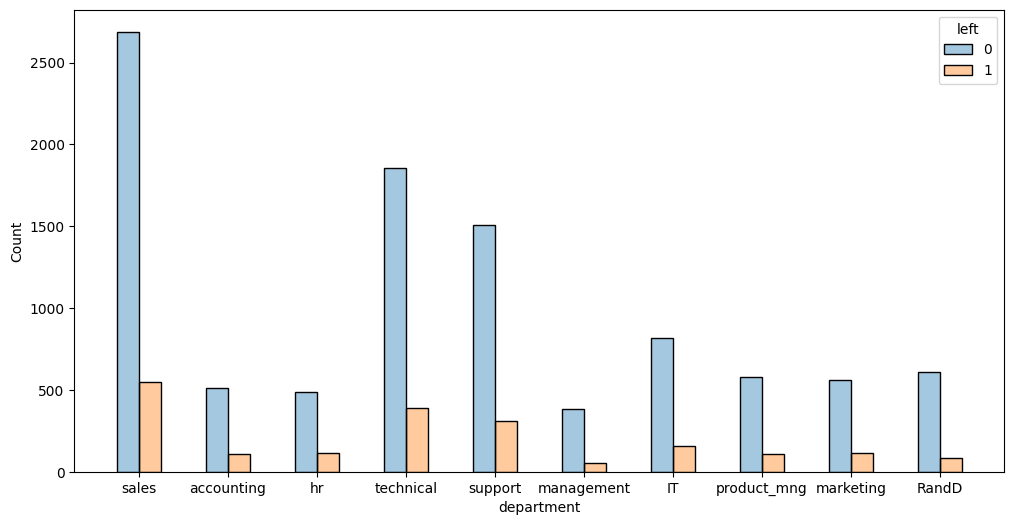

In [203]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_, x='department',hue='left', multiple='dodge', shrink=0.5, alpha=0.4)
plt.show()

**Left Employee by Accident**

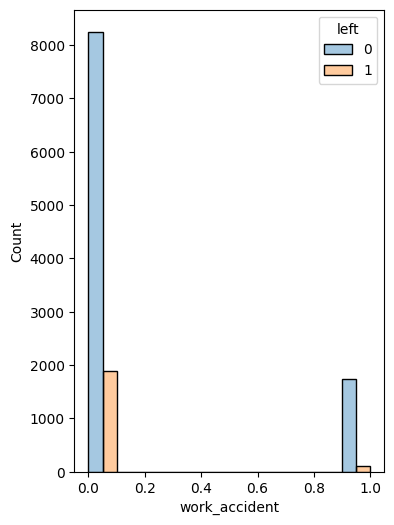

In [204]:
plt.figure(figsize=(4, 6))
sns.histplot(data=df_, x='work_accident',hue='left', multiple='dodge',\
             bins=[0,0.1,0.9,1], alpha=0.4)
plt.show()

In [272]:
df_.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [275]:
accident_left_table=pd.crosstab(df_['work_accident'],df_['left'])
stat_1, p_1, dof_1, expected_1 = chi2_contingency(accident_left_table)
print('Chi-square = ',stat_1)
print('p-value = ', round(p_1, 8))

Chi-square =  187.7378344525747
p-value =  0.0


# **Logistic Regression**

In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score , accuracy_score, precision_score, recall_score,f1_score,\
confusion_matrix, ConfusionMatrixDisplay, classification_report

In [206]:
df_lr = df_.copy()

In [207]:
df_lr = df_lr.drop('salary',axis=1)
df_lr = pd.get_dummies(df_lr, drop_first=True, dtype=int)

In [208]:
df_lr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'avg_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'salary_cat_num', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical'],
      dtype='object')

In [209]:
df_lr.shape

(11991, 18)

In [210]:
df_lr.info() # make sure every column are in a numeric form

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   avg_monthly_hours       11991 non-null  int64  
 4   tenure                  11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5years   11991 non-null  int64  
 8   salary_cat_num          11991 non-null  int64  
 9   department_RandD        11991 non-null  int64  
 10  department_accounting   11991 non-null  int64  
 11  department_hr           11991 non-null  int64  
 12  department_management   11991 non-null  int64  
 13  department_marketing    11991 non-null  int64  
 14  department_product_mng  11991 non-null  int

In [211]:
y = df_lr['left']
X = df_lr.drop('left', axis=1)

In [212]:
X

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,promotion_last_5years,salary_cat_num,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,2,0,0,0,1,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,1,2,0,0,0,1,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,1,2,0,0,0,1,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,1,2,0,0,0,0,1,0,0,0,0


In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [214]:
lr = LogisticRegression(max_iter=500).fit(X_train,y_train)

In [215]:
lr.coef_

array([[-3.80333546,  0.60520118, -0.26998028,  0.00403977,  0.31838228,
        -1.39662995, -0.87604443, -0.6320418 , -0.47379798,  0.06337002,
         0.1121436 , -0.38545389,  0.0873573 , -0.060356  ,  0.08363688,
        -0.02802778,  0.05243106]])

In [216]:
lr.feature_names_in_

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'avg_monthly_hours', 'tenure', 'work_accident',
       'promotion_last_5years', 'salary_cat_num', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng',
       'department_sales', 'department_support', 'department_technical'],
      dtype=object)

In [217]:
lr.intercept_

array([-0.36361445])

In [218]:
lr.n_features_in_

17

In [219]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [220]:
y_predict = lr.predict(X_test)

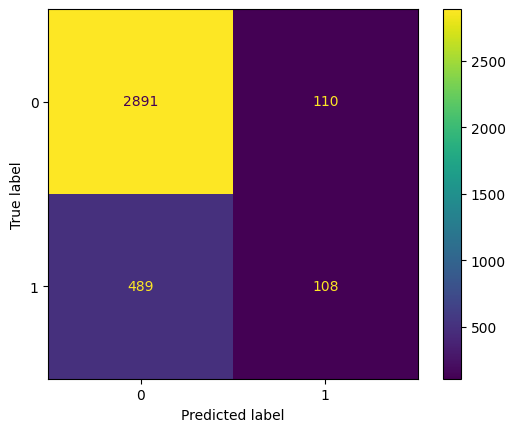

In [221]:
lr_cm = confusion_matrix(y_test, y_predict, labels=lr.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=lr.classes_)
# Plot confusion matrix
log_disp.plot()
# Display plot
plt.show()

In [222]:
print("Accuracy:", "%.6f" % accuracy_score(y_test, y_predict))
print("Precision:", "%.6f" % precision_score(y_test, y_predict))
print("Recall:", "%.6f" % recall_score(y_test, y_predict))
print("F1 Score:", "%.6f" % f1_score(y_test, y_predict))

Accuracy: 0.833519
Precision: 0.495413
Recall: 0.180905
F1 Score: 0.265031


In [267]:
def record_lr_model_metrices(model_name:str, y_predict, y_test):
    '''
    Arguments:
       model_name(string): the name will be shown in output table
       y_predict: the predicted y using X_train and y_train
       y_test: the split partial of y that used to test the logistic model result
    
    Returns a pandas dataframe table of logistic regression model fit metrics, including F1 score, precision, recall, and accuracy 
    '''
    accuracy = round(accuracy_score(y_test, y_predict), 6)
    f1 = round(f1_score(y_test, y_predict), 6)
    recall = round(recall_score(y_test, y_predict), 6)
    precision = round(precision_score(y_test, y_predict), 6)
    
    df = pd.DataFrame()
    df = pd.DataFrame({'model': [model_name],
                       'F1': [f1],
                       'precision': [precision],
                       'recall': [recall],
                       'accuracy': [accuracy]
                        })
    return df


Model Summary
The first Round of building Logistic Regression is low performance
Let's do it again by exclude the extreme values in the top three influencial features: satisfaction, 

**Second Round of Logistic Regression**

In [224]:
from sklearn.preprocessing import MinMaxScaler

In [264]:
scaler=MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [265]:
lr_scaled = LogisticRegression(max_iter=500).fit(X_train_scaled, y_train)

In [266]:
y_pred_lr = lr_scaled.predict(X_test_scaled)

In [269]:
lr_test_result = record_lr_model_metrices('lr_2',y_pred_lr, y_test)
lr_test_result

,model,F1,precision,recall,accuracy
0,lr_2,0.267813,0.502304,0.18258,0.834352


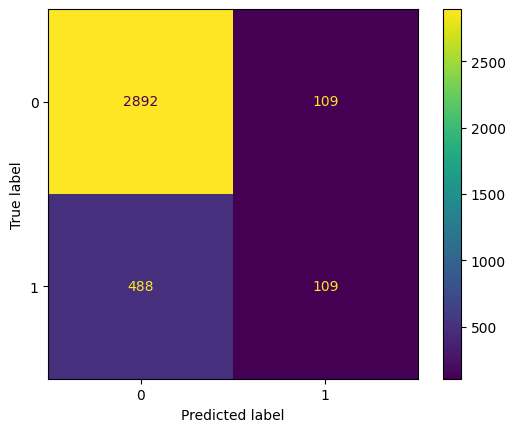

In [270]:
cm_lr2 = confusion_matrix(y_test, y_predict, labels=lr_scaled.classes_)
disp_lr2 = ConfusionMatrixDisplay(confusion_matrix=cm_lr2, display_labels=lr_scaled.classes_)
# Plot confusion matrix
disp_lr2.plot()
# Display plot
plt.show()

# **Build a Random Forest Classifier**

In [228]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [229]:
df_rf = df_.copy().drop('salary', axis=1)
df_rf = pd.get_dummies(df_rf, drop_first=False)

In [230]:
df_rf.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary_cat_num,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [231]:
y = df_rf['left']
X = df_rf.drop('left', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [232]:
grid_params ={'n_estimators': [50, 150, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 5, 8]}

**Fit the Model**

In [233]:
rf = RandomForestClassifier(random_state=42)
metric_list = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
rf_cv = GridSearchCV(rf, param_grid=grid_params, scoring=metric_list, cv=5, refit='roc_auc')
rf_cv.fit(X_train, y_train)

KeyboardInterrupt: 

**Record the Fit model by Pickle**

In [240]:
import pickle

In [ ]:
with open(BASE_DIR / 'rf_cv_model.pickle', 'wb') as to_write:
    pickle.dump(rf_cv, to_write)

In [241]:
with open(BASE_DIR /'rf_cv_model.pickle', 'rb') as to_read:
    rf_model = pickle.load(to_read)

**Getting GridSearch Result**

In [242]:
def record_best_cv_result(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): model name in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas dataframe with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    df = pd.DataFrame()
    df = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return df

In [243]:
cv_result_rf1 = record_best_cv_result('random forest cv', rf_model, 'auc')
cv_result_rf1

,model,precision,recall,F1,accuracy,auc
0,random forest cv,0.978252,0.901533,0.938273,0.980318,0.9821


**Test the Model Result on Best Estimators**

In [244]:
pred_rf1 = rf_model.best_estimator_.predict(X_test) 
# apply the best estimator, which is derived from X train, on the X test to predict y   

In [ ]:
def get_test_metrics(model_name:str, prediction, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  model name in the output table
        prediction:           a predict object that used X test data and best estimator
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''
    auc = roc_auc_score(y_test_data, prediction)
    accuracy = accuracy_score(y_test_data, prediction)
    precision = precision_score(y_test_data, prediction)
    recall = recall_score(y_test_data, prediction)
    f1 = f1_score(y_test_data, prediction)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [ ]:
test_scores_rf1 = get_test_metrics('random_forest_1', pred_rf1, y_test)
test_scores_rf1

,model,precision,recall,f1,accuracy,AUC
0,random_forest_1,0.986985,0.913655,0.948905,0.983656,0.955627


**Confusion Tabel of the Random Forest Model**

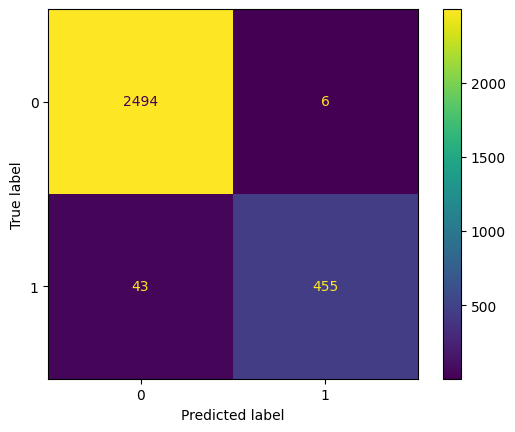

In [ ]:
cm = confusion_matrix(y_test, pred_rf1, labels=rf_model.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(values_format='')

**Top Important Features from the Random Forest Model**

In [ ]:
# save the features and its importance into a Series to 
feat_impt = pd.Series(rf_model.best_estimator_.feature_importances_, index=X.columns)
top10_feat_impt = feat_impt.nlargest(10) # save 
y_df = top10_feat_impt.reset_index()
y_df.columns = ["Feature", "Importance"]
y_sort_df = y_df.sort_values("Importance", ascending=False)

[]

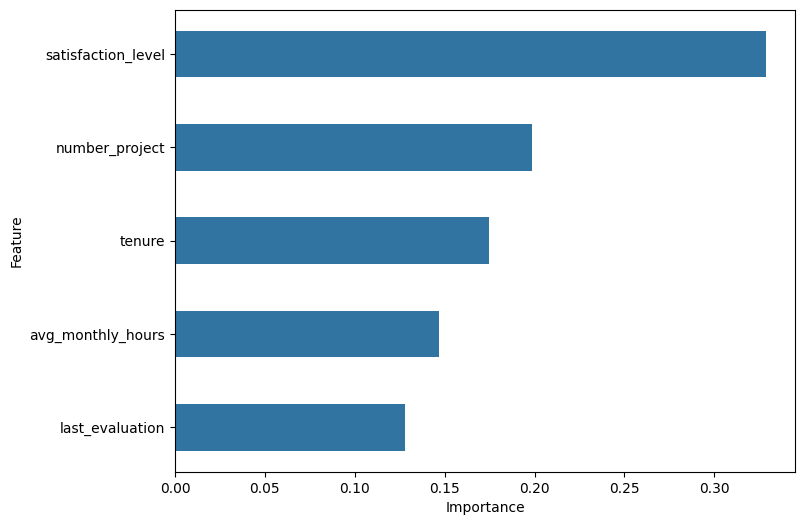

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=y_sort_df[y_sort_df['Importance']> 0.05], x='Importance', y='Feature', order=y_sort_df['Feature'], width=0.5)
plt.plot()

In [ ]:
print(rf_model.best_estimator_.criterion)

gini


# **Build Another Random Forest Model without Satisfaction and Work Hours**

In [245]:
X_2 = X.drop(['satisfaction_level','avg_monthly_hours'], axis=1)


In [ ]:
X_2.head()

,last_evaluation,number_project,tenure,work_accident,promotion_last_5years,salary_cat_num,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,3,0,0,0,False,False,False,False,False,False,False,True,False,False
1,0.86,5,6,0,0,1,False,False,False,False,False,False,False,True,False,False
2,0.88,7,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.87,5,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.52,2,3,0,0,0,False,False,False,False,False,False,False,True,False,False


In [249]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.25, stratify=y, random_state=42)

In [ ]:
rf_2 = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_2, param_grid=grid_params, scoring=metric_list, cv=5, refit='roc_auc')
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [50, 150, 300]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [ ]:
with open(BASE_DIR / 'rf_cv_model_2.pickle', 'wb') as to_write:
    pickle.dump(rf_cv, to_write)

In [246]:
with open(BASE_DIR / 'rf_cv_model_2.pickle', 'rb') as to_read:
    rf_model_2 = pickle.load(to_read)

In [247]:
cv_result_rf2 = record_best_cv_result('random forest cv 2', rf_model_2, 'auc')
cv_result_rf2

,model,precision,recall,F1,accuracy,auc
0,random forest cv 2,0.885804,0.825198,0.854303,0.953297,0.969364


In [ ]:
cv_result_rf1 #checking for difference

,model,precision,recall,F1,accuracy,auc
0,random forest cv,0.978252,0.901533,0.938273,0.980318,0.9821


In [250]:
pred_rf2 = rf_model_2.best_estimator_.predict(X_test) 

**Getting the Test Result of the Second Random Forest Model**

In [251]:
test_scores_rf2 = get_test_metrics('random_forest_2', pred_rf2, y_test)
test_scores_rf2

,model,precision,recall,f1,accuracy,AUC
0,random_forest_2,0.889121,0.853414,0.870902,0.957972,0.916107


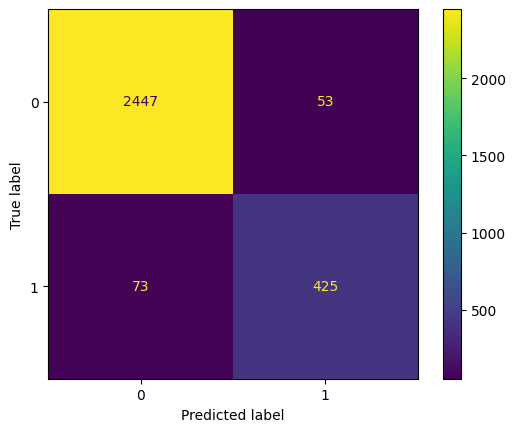

In [252]:
cm_rf2 = confusion_matrix(y_test, pred_rf2) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf2)
disp.plot(values_format='')

In [254]:
feat_impt_rf2 = pd.Series(rf_model_2.best_estimator_.feature_importances_, index=X_2.columns)
feat_impt_rf2

last_evaluation           0.246911
number_project            0.428245
tenure                    0.273408
work_accident             0.019606
promotion_last_5years     0.001205
salary_cat_num            0.018804
department_IT             0.000919
department_RandD          0.001439
department_accounting     0.000999
department_hr             0.000803
department_management     0.000919
department_marketing      0.000673
department_product_mng    0.000956
department_sales          0.001958
department_support        0.001458
department_technical      0.001696
dtype: float64

In [256]:
top10_feat_impt_rf2 = feat_impt_rf2.nlargest(7) # save 
y_df_rf2 = top10_feat_impt_rf2.reset_index()
y_df_rf2.columns = ["Feature", "Importance"]
y_df_rf2


,Feature,Importance
0,number_project,0.428245
1,tenure,0.273408
2,last_evaluation,0.246911
3,work_accident,0.019606
4,salary_cat_num,0.018804
5,department_sales,0.001958
6,department_technical,0.001696


**Sorted Important Features in predicting Turnover**

[]

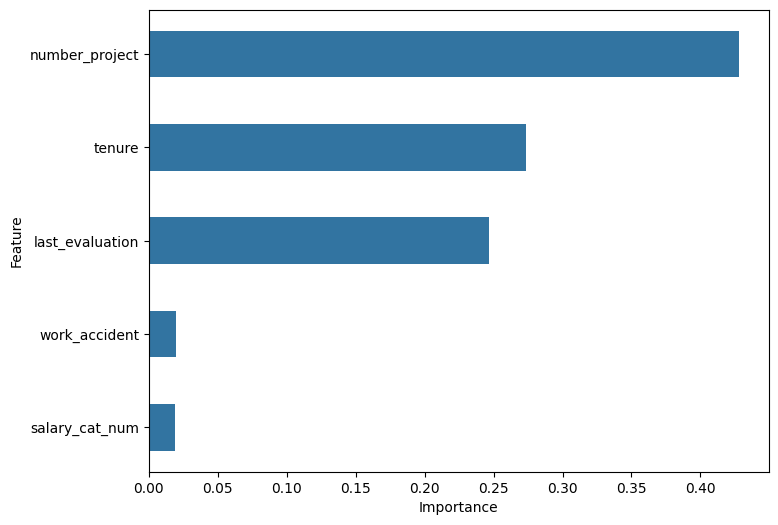

In [262]:
y_rf2_sorted = y_df_rf2.sort_values("Importance", ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(data=y_rf2_sorted[y_rf2_sorted['Importance']> 0.01], x='Importance', y='Feature', width=0.5)
plt.plot()